In [1]:
##Ben Pelto June 2019
###using this script to plot the thickness difference for an individual glacier between OGGM linear gradient and 
###a user defined mass balance gradient

# Python imports
import os
import pandas as pd
import salem
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import oggm
from oggm import cfg, utils, workflow, tasks, graphics
from oggm.workflow import execute_entity_task, gis_prepro_tasks, climate_tasks

font = {'family' : 'Optima',
        'weight' : 'normal',
        'size'   : 8}

plt.rc('font', **font)

In [2]:
#data points gradients
grad = [6.84, 9.8, 7.11, 7.95, 10.84, 6.01, 7.92] # mm w.e. m-1 

srtm = [-1.58, -6.95, -6.47, -5.71, -5.86, -6.11, 0.48]
products_dir = '/home/pelto/Desktop/ice_thick/'
glacier = ['Kokanee', 'Haig', 'Conrad', 'W.Washmawapta', 'Illecillewaet', 'Nordic', 'Zillmer']

In [3]:
WORKING_DIR = utils.get_temp_dir('ice_thickness')
utils.mkdir(WORKING_DIR, reset=True)
cfg.initialize(logging_level='WORKFLOW')
cfg.PATHS['working_dir'] = WORKING_DIR

# dx = 100 
# cfg.PARAMS['use_rgi_area'] = False
cfg.PARAMS['border'] = 10

# Get the RGI glaciers for the run.
rgi_list = ['RGI60-02.00147', 'RGI60-02.01857', 'RGI60-02.02171', 'RGI60-02.03411', 'RGI60-02.03688'
            , 'RGI60-02.04264', 'RGI60-02.07780']

2019-11-14 13:46:47: oggm.cfg: Using configuration file: /home/pelto/anaconda2/envs/oggm_env/lib/python3.6/site-packages/oggm/params.cfg


In [4]:
rgidf = utils.get_rgi_glacier_entities(rgi_list) 
gdirs = workflow.init_glacier_regions(rgidf)
workflow.gis_prepro_tasks(gdirs)
workflow.climate_tasks(gdirs)
workflow.inversion_tasks(gdirs)
workflow.execute_entity_task(tasks.distribute_thickness_per_altitude, gdirs);
# gdir = gdirs[0]
# tasks.init_present_time_glacier(gdirs) 

2019-11-14 13:46:48: oggm.workflow: Execute entity task define_glacier_region on 7 glaciers
2019-11-14 13:46:48: oggm.workflow: Multiprocessing: using all available processors (N=8)
/home/pelto/anaconda2/envs/oggm_env/lib/python3.6/site-packages/geopandas/io/file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():
/home/pelto/anaconda2/envs/oggm_env/lib/python3.6/site-packages/geopandas/io/file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():
/home/pelto/anaconda2/envs/oggm_env/lib/python3.6/site-packages/geopandas/io/file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():
/home/pelto/anaconda2/envs/oggm_env/lib/python3.6/site-packages/geopandas/io/file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():
/home/pelto/anaconda2/envs/oggm_env/lib/python3.6/site-packages/geopandas/io/file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers()

In [5]:
import geopandas as gpd
shape=gpd.read_file("/home/pelto/GIS/outlines/ice_thick_glaciers.shp")
shape

,RGIId,GLIMSId,BgnDate,EndDate,CenLon,CenLat,O1Region,O2Region,Area,Zmin,...,Aspect,Lmax,Status,Connect,Form,TermType,Surging,Linkages,Name,geometry
0,RGI60-02.00147,G242863E49749N,20049999,20069999,-117.137,49.7490,2,3,1.801,2258,...,33,1738,0.0,0.0,0.0,0.0,0.0,9,None,"POLYGON ((-117.151037 49.75008800000006, -117...."
1,RGI60-02.01857,G244699E50711N,20049999,20069999,-115.301,50.7108,2,3,2.585,2482,...,116,2839,0.0,0.0,0.0,0.0,0.0,9,None,"POLYGON ((-115.312561 50.71309000000008, -115...."
2,RGI60-02.03411,G243670E51177N,20049999,20069999,-116.330,51.1770,2,3,0.872,2390,...,69,1181,0.0,0.0,0.0,0.0,0.0,9,None,"POLYGON ((-116.323606 51.18003200000004, -116...."
3,RGI60-02.07780,G240419E52671N,20049999,20069999,-119.581,52.6705,2,3,6.490,1717,...,356,4150,0.0,0.0,0.0,0.0,0.0,9,None,POLYGON ((-119.5952742098528 52.68276424606576...
4,RGI60-02.04264,G242290E51429N,20049999,20069999,-117.710,51.4292,2,3,4.425,1979,...,14,2540,0.0,0.0,0.0,0.0,0.0,9,None,POLYGON ((-117.7251266266143 51.42201803589593...
5,RGI60-02.03688,G242566E51237N,20049999,20069999,-117.434,51.2370,2,3,5.944,1992,...,297,3958,0.0,0.0,0.0,0.0,0.0,9,None,POLYGON ((-117.4483424112458 51.22971735581437...
6,RGI60-02.02171,G243070E50807N,20049999,20069999,-116.930,50.8069,2,3,16.898,1855,...,16,8626,NaN,NaN,NaN,NaN,NaN,9,None,POLYGON ((-116.9046869317124 50.78361803038761...


In [7]:
# df = xr.open_dataset(products_dir + glacier[num] + '_MBgrad_gridded.nc')
# df

In [9]:
# df = xr.open_dataset(products_dir + glacier[num] + '_MBgrad_gridded.nc')  #read in netCDF containing inversion data
# df   
# # coords = np.array([p.xy for p in df.Coordinates]).squeeze()

In [13]:
def plot_distributed(gdirs, ax=None, smap=None, varname_suffix=''):
    """Plots the result of the inversion out of a glacier directory.
    Method: 'alt' or 'interp'
    """

#     gdir = gdirs[num]
#     if len(gdirs) > 1:
#         raise NotImplementedError('Cannot plot a list of gdirs (yet)')
    
    #read in netCDF containing inversion data
    df = xr.open_dataset(products_dir + glacier[num] + '_MBgrad_gridded.nc')
    
    ds = xr.open_dataset(gdir.get_filepath('gridded_data')).load()
    ds['obs-default'] = df['obs-default']
    
    with utils.ncDataset(gdir.get_filepath('gridded_data')) as nc:
        topo = nc.variables['topo'][:]
        mask = nc.variables['glacier_mask'][:]

    grids_file = gdir.get_filepath('gridded_data')       
 
    with ds as nc:   #with utils.ncDataset(grids_file) as nc:
        import warnings
        with warnings.catch_warnings():
            # https://github.com/Unidata/netcdf4-python/issues/766
            warnings.filterwarnings("ignore", category=RuntimeWarning)
            vn = 'obs-default' + varname_suffix
            thick = nc.variables[vn][:]

    thick = np.where(mask, thick, np.NaN)

    smap.set_topography(topo)

    crs = gdir.grid.center_grid

    geom = gdir.read_pickle('geometries')

    # Plot boundaries
    poly_pix = geom['polygon_pix']
    smap.set_geometry(poly_pix, crs=crs, fc='none', zorder=2, linewidth=.2)
    for l in poly_pix.interiors:
        smap.set_geometry(l, crs=crs, color='black', linewidth=0.5)

    smap.set_cmap(OGGM_CMAPS['glacier_thickness'])
    smap.set_plot_params(nlevels=256)
    smap.set_data(thick)

    smap.plot(ax)

    return dict(cbar_label='Glacier thickness [m]')

In [16]:
 df = xr.open_dataset(products_dir + glacier[num] + '_MBgrad_gridded.nc')
    
ds = xr.open_dataset(gdir.get_filepath('gridded_data')).load()
ds['obs-default'] = df['obs-default']
with utils.ncDataset(gdir.get_filepath('gridded_data')) as nc:
    topo = nc.variables['topo'][:]
    mask = nc.variables['glacier_mask'][:]


In [17]:
topo

array([[2454., 2450., 2445., ..., 2646., 2627., 2568.],
       [2472., 2467., 2461., ..., 2617., 2602., 2558.],
       [2488., 2483., 2476., ..., 2584., 2574., 2551.],
       ...,
       [2191., 2199., 2206., ..., 2303., 2286., 2272.],
       [2178., 2187., 2194., ..., 2314., 2295., 2279.],
       [2165., 2173., 2180., ..., 2327., 2306., 2288.]], dtype=float32)

In [14]:
plot_distributed(gdir)

TypeError: 'GlacierDirectory' object does not support indexing

TypeError: 'GlacierDirectory' object does not support indexing

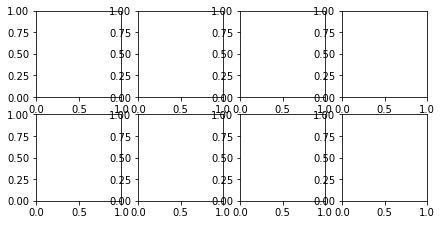

In [15]:
f, axarr = plt.subplots(2, 4, sharey=False, sharex=False, figsize=(7,3.5))#(12, 6))
j, k = 0, 0

shape.sort_values('CenLat', inplace=True, ascending=True) #sort the shapefile objects by latitude
GIDX= shape.index # save an index of the shapefiles
count=0

for i in range(7):
    num=count
#     df = xr.open_dataset(products_dir + glacier[num] + '_MBgrad_gridded.nc')  #read in netCDF containing inversion data
#     axarr[j, k].plot(df['obs-default']) #, cmap='RdBu', vmin =-50, vmax=50)
    gdir = gdirs[num]
    plot_distributed(gdir)
#     for i in np.arange(0,6,1):
#     x,y=df.xy
#     plt.plot(x,y,color='k',alpha=0.7)
#     rasterio.plot.show(Temp_raster,1)


    im = axarr[j, k].plot(df['obs-default'])#, cmap='RdBu', vmax=50, vmin=-50, s=1.)    
#     axarr[j, k].set_title(glacier[i])
       
    x,y=shape['geometry'][GIDX[count]].exterior.xy
    axarr[j, k].plot(x,y,color='k',alpha=0.7)
    
    ymin = np.round(min(y),3) -0.001
    ymax = np.round(max(y),3) + 0.001
    xmin = np.round(min(x),3) -0.001
    xmax = np.round(max(x),3) + 0.001

    axarr[j, k].set_xlim(xmin, xmax )
    axarr[j, k].set_ylim(ymin, ymax )
    axarr[j, k].set_xticks(np.round(np.arange(xmin, xmax, 0.02),2))
    axarr[j, k].ticklabel_format(useOffset=False)
    axarr[1, 3].axis('off')
    axarr[j, k].set_yticks(np.round(np.arange(ymin, ymax, 0.02),2))
    
    count=count+1  # work through the index
    
    k += 1

    if i == 3: #changed to 2, 1 worked for 2x2 panel plot
        j += 1
        k = 0
          
# plt.colorbar(im, pad=0.00, label='Ice thickness (m)')  

plt.tight_layout(pad=0)
# plt.savefig(products_dir + 'gpr_oggm_thick_all.pdf', dpi=300) 

In [ ]:
gdir